The input Micro-CT image size is: (128, 128, 128)
The image porosity is 0.17746496200561523


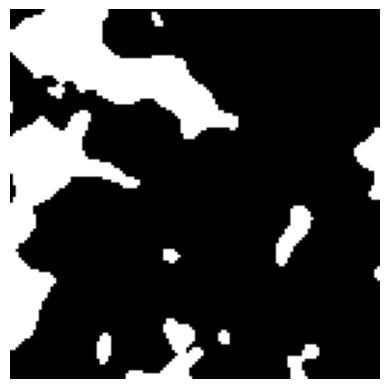

In [1]:
from ooppnm import wrap_openpnm
import os
import matplotlib.pyplot as plt
import porespy as ps

img_PATH = os.path.join(os.getcwd(),'notebook_examples/1.npy')
data_pnm = wrap_openpnm.Wrap_pnm(PATH=img_PATH)
print('The input Micro-CT image size is: {}'.format(data_pnm.im.shape))
print('The image porosity is {}'.format(ps.metrics.porosity(data_pnm.im)))
f = plt.figure()
plt.imshow(data_pnm.im[20,:,:],cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
data_pnm.network_extract()
data_pnm.add_boundary_pn()
data_pnm.init_physics()
data_pnm.invasion_percolation()

data = data_pnm.ip.pc_curve()
f = plt.figure()
plt.plot(data.snwp, data.pc, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-Wetting Phase Saturation')

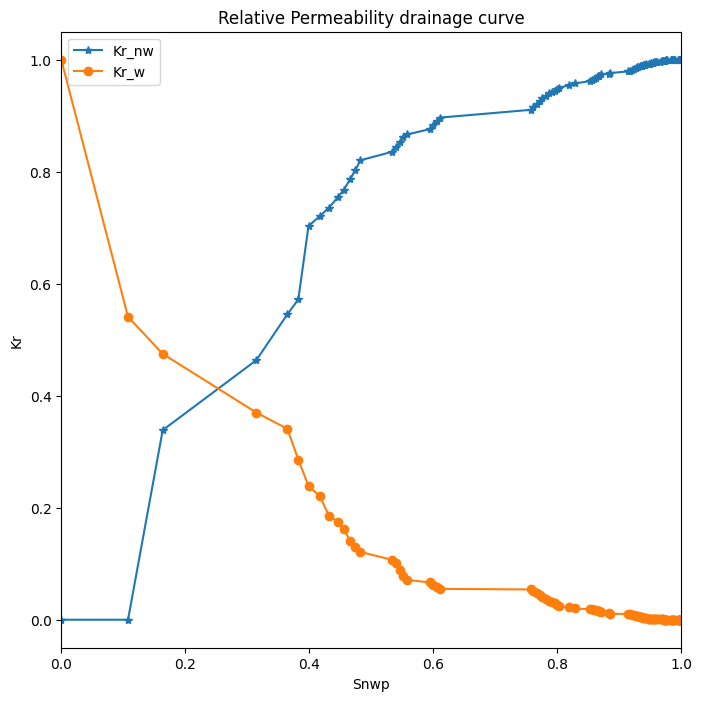

In [3]:
df = data_pnm.kr_simulation()
data_pnm.kr_visualize(df)

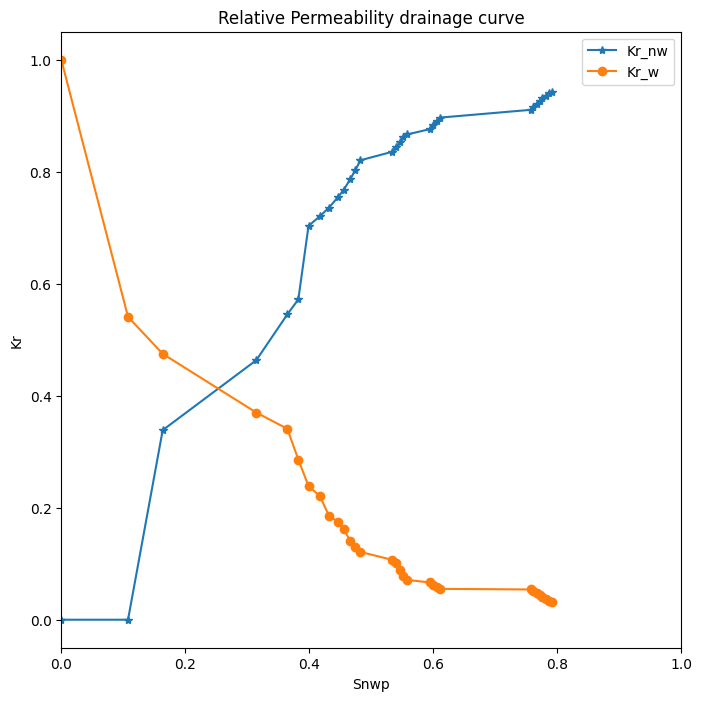

In [4]:
df_crop = data_pnm.crop_kr(df)
data_pnm.kr_visualize(df_crop)